In [36]:
import __init__
import os

import pandas as pd
import numpy as np
import scipy as sp
import sklearn
from matplotlib import pyplot as plt

from sklearn.neighbors import NearestNeighbors, KDTree, kneighbors_graph
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer
import sklearn.preprocessing as preprocessing
from sklearn.manifold import TSNE

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from repeated_CV_builder import DCV

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
    log_loss,
    roc_auc_score,
    RocCurveDisplay,
    PrecisionRecallDisplay
    
)
from sklearn.metrics import classification_report, multilabel_confusion_matrix, precision_recall_fscore_support
from collections import defaultdict
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
subproject_name = "trajectories"

wd = "../../../"
project_path = os.path.realpath(wd)
print(project_path)

raw_data_dir = project_path+"/raw_data/"
print(raw_data_dir)


data_dir = project_path+f"/{subproject_name}"+"/data/"
print(data_dir)

results_dir = project_path+f"/{subproject_name}"+"/output"
print(results_dir)


/exports/reum/nsteinz/Project_trajectories
/exports/reum/nsteinz/Project_trajectories/raw_data/
/exports/reum/nsteinz/Project_trajectories/trajectories/data/
/exports/reum/nsteinz/Project_trajectories/trajectories/output


In [38]:
features = [#'total Pijn',
            'TJC_28',
            #'TJC_44',
            #'total Zwelling',
            'SJC_28',
            #'SJC_44',
            #'Alkalische Fosfatase',
            #'Anti-CCP Kwant.',
            'ESR',
            #'C-Reaktief Proteïne',
            'leukocytes',
            #'Hematocriet',
            #'hemoglobin',
            "hb_corrected",
            #'IgM reumafactor',
                #'Anti-CCP',
            #'MCH',
            #'MCHC',
            #'MCV',
            'thrombocytes',
            #'Ferritine',
            #"Sex",
            
           ]


dmards = ['ABATACEPT',
       'ADALIMUMAB', 'ANAKINRA', 'SODIUM_AUROTHIOMALATE', 'AZATHIOPRINE',
       'BARICITINIB', 'CERTOLIZUMAB_PEGOL', 'CICLOSPORINE', 'CYCLOPHOSPHAMIDE',
       'ETANERCEPT', 'GOLIMUMAB', 'HYDROXYCHLOROQUINE', 'INFLIXIMAB',
       'LEFLUNOMIDE', 'METHOTREXATE', 'METHYLPREDNISOLONE', 'PREDNISOLONE',
       'SULFASALAZINE', 'TOCILIZUMAB', 'TOFACITINIB']
dmard_types = {
    "TNF_b_dmards" : ['ETANERCEPT', 'GOLIMUMAB','INFLIXIMAB','CERTOLIZUMAB_PEGOL', 'ADALIMUMAB'],
    "IL6_b_dmards" : ['CERTOLIZUMAB_PEGOL', 'TOCILIZUMAB'],
    "IL1_b_dmards" : ['ANAKINRA'],
    "tcell_b_dmards" : ['ABATACEPT'],
    "cs_dmards" : ["METHOTREXATE",'HYDROXYCHLOROQUINE','LEFLUNOMIDE', 'SULFASALAZINE'],
    "jak_dmard" : ['TOFACITINIB', 'BARICITINIB'],
    "XO_damrd" : ['AZATHIOPRINE'],
    "OP_dmard" : ["CYCLOPHOSPHAMIDE"],
    "TC_dmard" : ["CICLOSPORINE"],
    "gld_dmard": ["SODIUM_AUROTHIOMALATE"]
    #"predni":  ['PREDNISOLONE',"METHYLPREDNISOLONE"],
}
predni=  ['PREDNISOLONE',"METHYLPREDNISOLONE"]
set(dmards)- set([j for x in dmard_types for j in dmard_types[x]])


features_o = [f"{x}_o" for x in features]
features_o

['TJC_28_o',
 'SJC_28_o',
 'ESR_o',
 'leukocytes_o',
 'hb_corrected_o',
 'thrombocytes_o']

In [39]:
data_heatmap = pd.read_csv(data_dir+"labeled_data_back-up.csv", parse_dates=["DATUM"])
#data_heatmap["age_cate"] = data_heatmap.age_cate.astype("category")
data_heatmap.columns
#data_heatmap = data_heatmap.sort_values("DATUM").groupby("PATNR").head(1)

Index(['TJC_28', 'SJC_28', 'ESR', 'leukocytes', 'hb_corrected', 'MCV',
       'thrombocytes', 'TJC_28_o', 'SJC_28_o', 'ESR_o', 'leukocytes_o',
       'hb_corrected_o', 'MCV_o', 'thrombocytes_o', 'das28_n', 'das28',
       'das44', 'SJC_44_o', 'TJC_44_o', 'aCCP positive', 'RF positive',
       'label', 'days', 'days_nlp', 'PATNR', 'DATUM', 'Age', 'sex',
       'dmard_usage', 'symptomDuration', 'days_DMARD', 'Hemoglobine',
       'sequence', 'Age_n', 'remision', 'ABATACEPT', 'ADALIMUMAB', 'ANAKINRA',
       'SODIUM_AUROTHIOMALATE', 'AZATHIOPRINE', 'BARICITINIB',
       'CERTOLIZUMAB_PEGOL', 'CICLOSPORINE', 'CYCLOPHOSPHAMIDE', 'ETANERCEPT',
       'GOLIMUMAB', 'HYDROXYCHLOROQUINE', 'INFLIXIMAB', 'LEFLUNOMIDE',
       'METHOTREXATE', 'SULFASALAZINE', 'TOCILIZUMAB', 'TOFACITINIB',
       'METHYLPREDNISOLONE', 'PREDNISOLONE', 'TNF_b_dmards', 'IL6_b_dmards',
       'IL1_b_dmards', 'tcell_b_dmards', 'cs_dmards', 'jak_dmard', 'XO_damrd',
       'OP_dmard', 'TC_dmard', 'gld_dmard', 'count', 'no_

In [40]:
print(features)
scaler =MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data_heatmap[features_o].values)
scaler.transform(data_heatmap[features_o].values)


['TJC_28', 'SJC_28', 'ESR', 'leukocytes', 'hb_corrected', 'thrombocytes']


array([[0.14285714, 0.16666667, 0.32352941, 0.69561448, 0.63059704,
        0.54123113],
       [0.07142857, 0.125     , 0.05147059, 0.40338692, 0.60820894,
        0.30778165],
       [0.07142857, 0.08333333, 0.14705882, 0.36778116, 0.70895528,
        0.27642276],
       ...,
       [0.        , 0.        , 0.02941176, 0.46591404, 0.69776121,
        0.43321719],
       [0.        , 0.        , 0.22794118, 0.4706904 , 0.66417909,
        0.46225319],
       [0.        , 0.        , 0.06617647, 0.38428138, 0.68656713,
        0.34727062]])

In [41]:

x = data_heatmap.query("days == 0").reset_index()
#x = data_heatmap.query("to_clust != -1")
x
x_o = x[features_o]

In [42]:

x = data_heatmap.query("days == 0").reset_index()
#x = data_heatmap.query("to_clust != -1")
x
x_o = x[features_o]

#y = data_heatmap.query("to_clust != -1")["to_clust"]
y = x["global_trajectory"]
y_o = x["global_trajectory_o"]
#y = x["label"]

x = x[features 
                 #+ ["aCCP positive", "RF positive"] 
    
                 #+ ["Age", "sex"]
                 #+ dmards
                ]


In [43]:
x_used = x[features 
                 #+ ["aCCP positive", "RF positive"]
                 #+ ["label"]
                 #+ dmards
                ]


Index(['TJC_28_o', 'SJC_28_o', 'ESR_o', 'leukocytes_o', 'hb_corrected_o',
       'thrombocytes_o', 'label', 'test_label'],
      dtype='object')


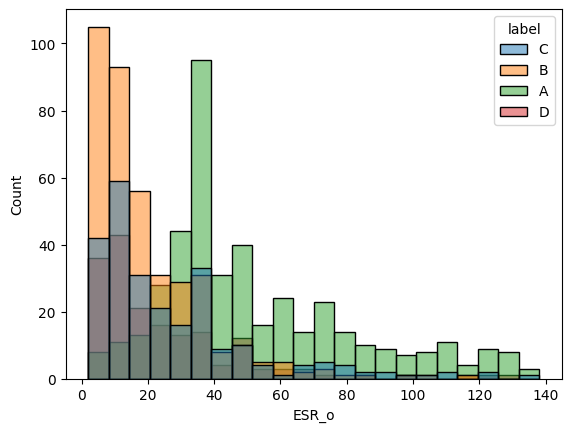

In [44]:
import seaborn as sns
x_o["label"] =y
x_o["test_label"] = "B"
print(x_o.columns)
sns.histplot(data =x_o, x="ESR_o", hue="label")
x_o["test_label"] = "B"
x_o.loc[x_o.query("ESR_o >= 35").index, "test_label"] = "A"

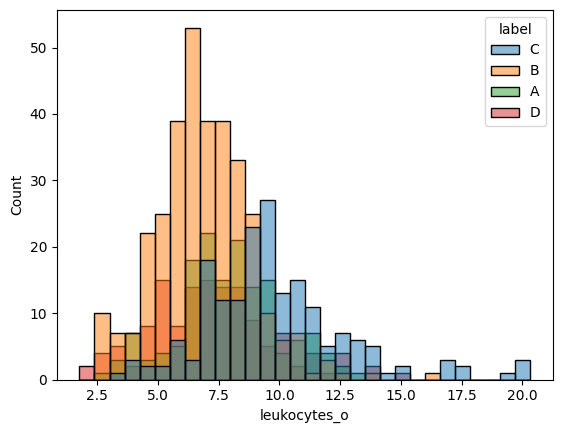

In [45]:
sns.histplot(data =x_o.query("ESR_o < 35"), x="leukocytes_o", hue="label")
x_o.loc[x_o.query("ESR_o < 45 & leukocytes_o >= 8.5").index, "test_label"] = "C"

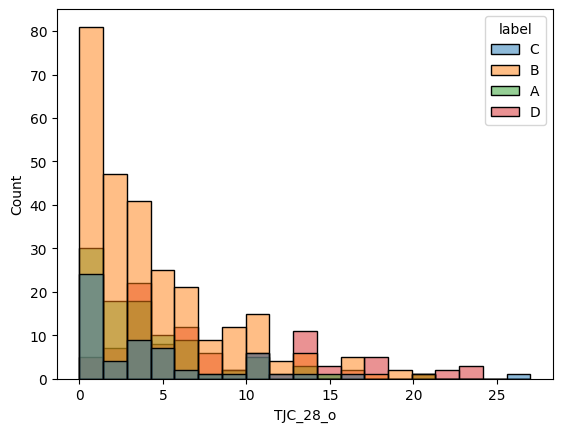

In [46]:
sns.histplot(data=x_o.query('test_label == "B"'),x="TJC_28_o", hue="label")
x_o.loc[x_o.query("ESR_o < 50 & leukocytes_o < 10 &  SJC_28_o >= 4").index, "test_label"] = "D"

In [47]:
train_index, test_index = train_test_split(y.index,test_size = 0.2, random_state = 42, stratify = y)
X_train = x.loc[train_index,:]
X_test = x.loc[test_index,:]
X_train_o = x_o.loc[train_index,:]
X_test_o = x_o.loc[test_index,:]
y_train = y.loc[train_index]
y_test = y.loc[test_index]
y_train_o = y.loc[train_index]
y_test_o = y.loc[test_index]

In [48]:
from sklearn import linear_model


In [49]:
from sklearn import svm, linear_model
model = linear_model.LogisticRegression(penalty="elasticnet", max_iter=10000, solver="saga", class_weight="balanced")
rcv = DCV(model)
# prints all the params you can change :)
print(model.get_params().keys())
# select which params you want to test with the inner loop
# space is the paramater space
rcv.hyperParams['C'] = [100, 10, 1.0]
rcv.hyperParams['l1_ratio'] = [ 0,0.3,0.5,0.9,1]


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [50]:
rcv.train_fit(X_train, y_train, loop=1)

Training progress: [--------------------------------------------------] 0.0% 


/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version 

Training progress: [##########----------------------------------------] 20.0% 
Training progress: [####################------------------------------] 40.0% 
Training progress: [##############################--------------------] 60.0% 
Training progress: [########################################----------] 80.0% 
Training progress: [##################################################] 100.0% Done...



In [51]:
#rcv.save_all_data(modelname="SVM_",directory=results_dir)
rcv.test_accuracy["values"]

0    0.535354
1    0.545455
2    0.525253
3    0.565657
4    0.540404
Name: values, dtype: float64

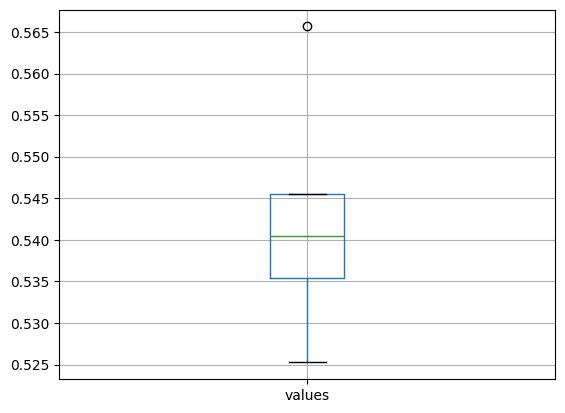

values    0.542424
dtype: float64

In [52]:
rcv.test_accuracy["values"].to_frame().boxplot()
plt.show()
rcv.test_accuracy["values"].to_frame().mean()

In [53]:
rcv.test_precision["values"].to_frame().mean(), 
print(rcv.test_precision.values.max())
rcv.test_precision.values

100.0


array([[  0.5454114 ,   1.        ,   0.9       ],
       [  0.53241855,   1.        ,   0.9       ],
       [  0.503885  , 100.        ,   0.        ],
       [  0.54781306,   1.        ,   0.9       ],
       [  0.51903195,   1.        ,   0.        ]])

In [54]:
rcv.test_f1["values"].to_frame().mean() , rcv.test_f1.idxmax()

(values    0.519877
 dtype: float64,
 values      3
 C           2
 l1_ratio    0
 dtype: int64)

In [55]:
rcv.test_recall["values"].to_frame().mean()

values    0.529214
dtype: float64

In [56]:
print(rcv.test_f1.l1_ratio.mean(), rcv.test_f1)

0.54      values      C  l1_ratio
0  0.518961    1.0       0.9
1  0.529195    1.0       0.9
2  0.498732  100.0       0.0
3  0.541507    1.0       0.9
4  0.510990    1.0       0.0


In [57]:
rcv.train_recall

C            100.0                                             10.0   \
l1_ratio       0.0       0.3       0.5       0.9       1.0       0.0   
0         0.549627  0.551189  0.551189  0.552082  0.552082  0.548230   
1         0.515790  0.517352  0.516459  0.515567  0.515567  0.518129   
2         0.541574  0.541574  0.541574  0.541574  0.541574  0.540614   
3         0.546502  0.546502  0.546502  0.546502  0.546502  0.544940   
4         0.518641  0.518641  0.516369  0.515476  0.515476  0.519896   

C                                                    1.0              \
l1_ratio       0.3       0.5       0.9       1.0       0.0       0.3   
0         0.546957  0.546064  0.549519  0.549519  0.535895  0.535788   
1         0.516567  0.515674  0.514674  0.514781  0.521689  0.520796   
2         0.540829  0.541722  0.538449  0.540722  0.534726  0.531074   
3         0.545940  0.546502  0.545502  0.545502  0.534623  0.537078   
4         0.517293  0.516293  0.516186  0.513913  0.524429  0.520661   

C                                       
l1_ratio       0.5       0.9       1.0  
0         0.542029  0.553329  0.549569  
1         0.521582  0.531295  0.526947  
2         0.529694  0.533993  0.531613  
3         0.539351  0.548610  0.548502  
4         0.522446  0.518084  0.514481

In [58]:
model = linear_model.LogisticRegression(penalty="elasticnet", max_iter=10000, solver="saga", C=1, l1_ratio=0)


In [59]:
rcv.Model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
model = linear_model.LogisticRegression(penalty="elasticnet", 
                                        max_iter=10000, 
                                        solver="saga", 
                                        l1_ratio=0.9, 
                                        C = 10, 
                                        #class_weight="balanced"
                                       )
#model.fit(X_train, y_train)
name = "elastic net"
model.fit(X_train, y_train)
scores = defaultdict(list)
y_pred = model.predict(X_train)
scores["Classifier"].append(name)
scores["accuracy"].append(accuracy_score(y_train, y_pred))               
scores["precision"].append(precision_score(y_train, y_pred, average="macro"))
scores["recall"].append(recall_score(y_train, y_pred, average="macro"))
scores["f1"].append(f1_score(y_train, y_pred, average="macro"))
#roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr")
scores

defaultdict(list,
            {'Classifier': ['elastic net'],
             'accuracy': [0.5915065722952477],
             'precision': [0.5628262279272376],
             'recall': [0.5172578325848214],
             'f1': [0.5195565420789919]})

In [61]:

scores = defaultdict(list)
y_pred = model.predict(X_test)
scores["Classifier"].append(name)
scores["accuracy"].append(accuracy_score(y_test, y_pred))           
scores["precision"].append(precision_score(y_test, y_pred, average="micro"))
scores["recall"].append(recall_score(y_test, y_pred, average="micro"))
scores["f1"].append(f1_score(y_test, y_pred, average="micro"))
#roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr")
print(len(y_test))
scores

248


defaultdict(list,
            {'Classifier': ['elastic net'],
             'accuracy': [0.6008064516129032],
             'precision': [0.6008064516129032],
             'recall': [0.6008064516129032],
             'f1': [0.6008064516129032]})

In [62]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, precision_recall_fscore_support
print(classification_report(y_test, y_pred))
precision_recall_fscore_support(y_test, y_pred)

              precision    recall  f1-score   support

           A       0.73      0.71      0.72        86
           B       0.52      0.71      0.60        77
           C       0.71      0.48      0.57        50
           D       0.38      0.26      0.31        35

    accuracy                           0.60       248
   macro avg       0.58      0.54      0.55       248
weighted avg       0.61      0.60      0.59       248



(array([0.72619048, 0.51886792, 0.70588235, 0.375     ]),
 array([0.70930233, 0.71428571, 0.48      , 0.25714286]),
 array([0.71764706, 0.6010929 , 0.57142857, 0.30508475]),
 array([86, 77, 50, 35]))

In [63]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[139,  23],
        [ 25,  61]],

       [[120,  51],
        [ 22,  55]],

       [[188,  10],
        [ 26,  24]],

       [[198,  15],
        [ 26,   9]]])

In [64]:
model.fit(X_train, y_train)

LogisticRegression(C=10, l1_ratio=0.9, max_iter=10000, penalty='elasticnet',
                   solver='saga')

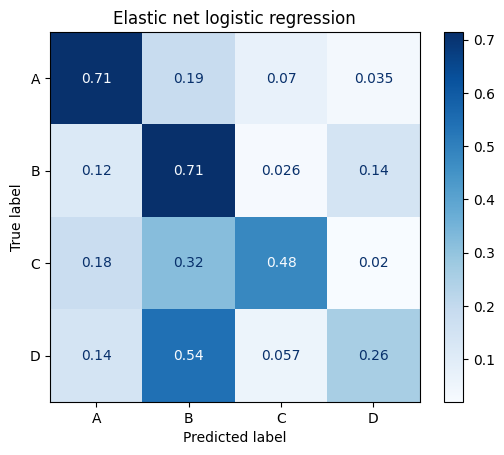

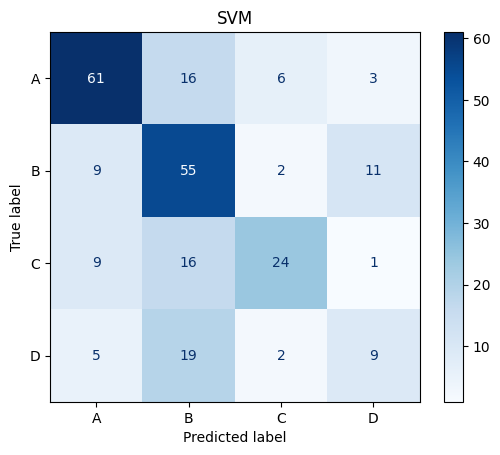

In [65]:


disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        
        cmap=plt.cm.Blues,
    normalize = "true",

    )
plt.title("Elastic net logistic regression")
plt.grid(False)
plt.savefig("Figure_5_Predictie.png",dpi=1000)
plt.show()
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        
        cmap=plt.cm.Blues,
    #normalize = "true",

    )


plt.title("SVM")
plt.grid(False)
plt.show()

In [66]:
final = data_heatmap.query("days == 0").reset_index()
final["pred"] = model.predict(final[features])
final[["PATNR", "global_trajectory", "pred"]].to_csv(results_dir+"/additional_analysis.csv",)

In [68]:

final[["probability_A","probability_B","probability_C","probability_D",]] = model.predict_proba(final[features])

In [69]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=0)



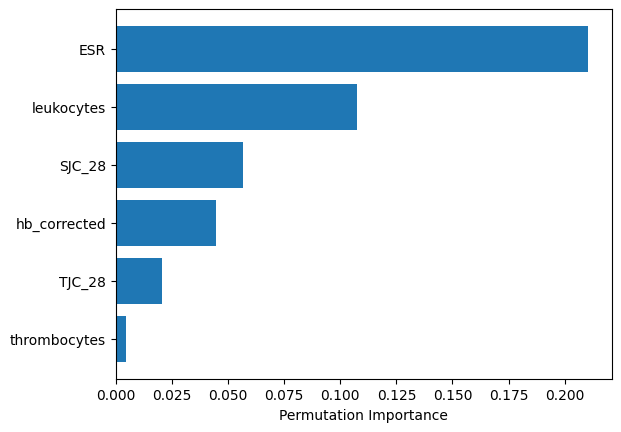

In [70]:
feature_names = x.columns
features_ = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features_[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

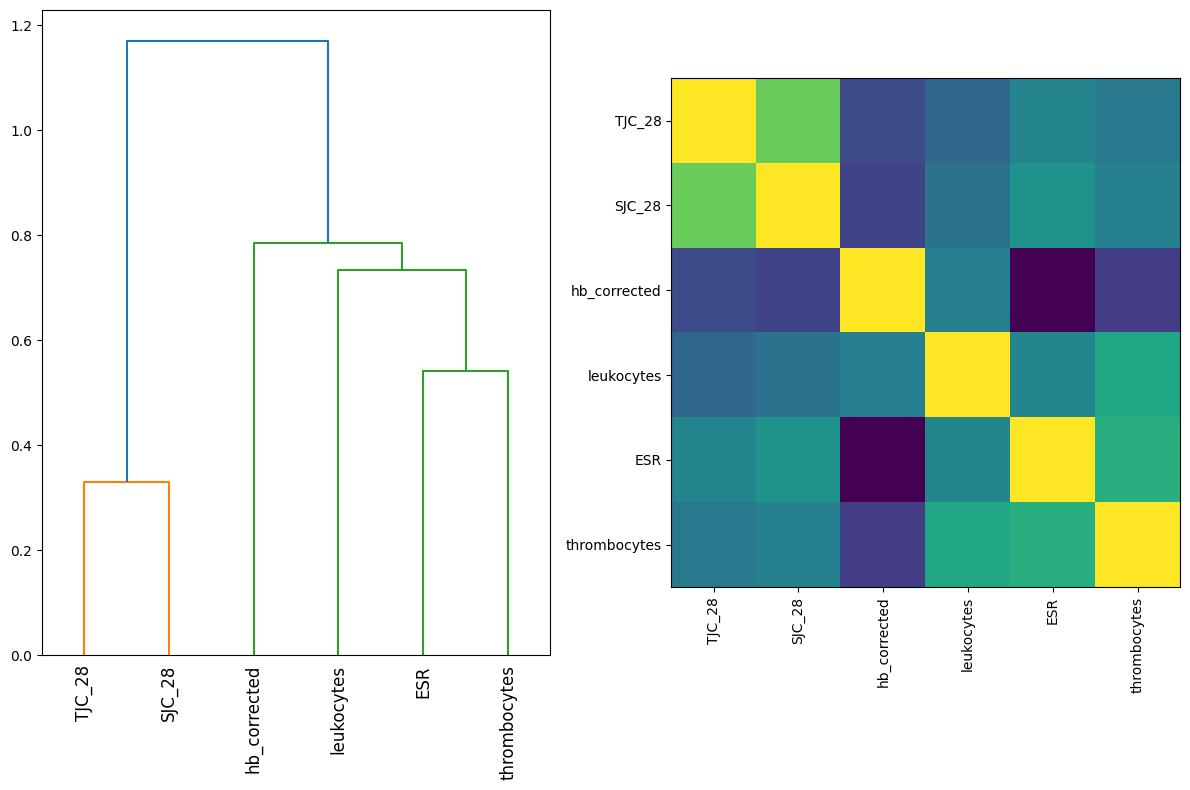

In [71]:
from scipy.stats import spearmanr, cosine
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(x).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=features_.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [72]:
cluster_ids = hierarchy.fcluster(dist_linkage, 0, criterion="inconsistent")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

clf_sel = svm.SVC(kernel="rbf",C=10, max_iter=10000, decision_function_shape='ovr')
clf_sel.fit(X_train_sel, y_train)
print(
    "Accuracy on test data with features removed: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)

Accuracy on test data with features removed: 0.61


In [73]:
features_[selected_features]

array(['TJC_28', 'ESR', 'leukocytes', 'hb_corrected'], dtype=object)

In [74]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, precision_recall_curve

In [76]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
cv = StratifiedKFold(2, shuffle=True, random_state=0)
score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    model, x, y, scoring="accuracy", cv=cv, n_permutations=1000
)

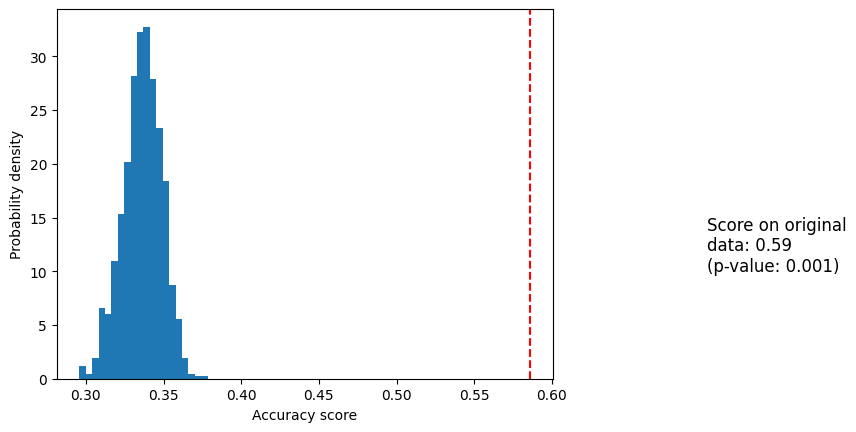

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

In [78]:
med_data = pd.read_csv(data_dir+"life_line_data.csv", parse_dates=["PEC","last_visit","baseline_year","first_med_date","first_pred_date"])


/tmp/ipykernel_894245/2427944885.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  med_data = pd.read_csv(data_dir+"life_line_data.csv", parse_dates=["PEC","last_visit","baseline_year","first_med_date","first_pred_date"])


,PATNR,global_trajectory,sex,aCCP positive,RF positive,symptomDuration,label,pred,PEC,last_visit,baseline_year,first_med_date,first_pred_date
0,304828067,B,0,False,False,0.0,1,B,2011-08-31,2014-01-15,2011.0,2011-11-18,NaT
1,304837810,C,1,True,True,186.0,4,B,2011-09-05,2015-04-22,2011.0,2012-01-09,NaT
2,304835849,A,1,True,True,0.0,8,A,2011-09-07,2022-10-24,2011.0,2012-05-08,NaT
3,304867071,C,0,True,False,248.0,7,D,2011-09-08,2017-03-14,2011.0,2011-09-15,2011-11-10
4,304836407,A,1,True,False,0.0,6,A,2011-09-16,2022-10-04,2011.0,2011-09-21,2014-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,304820662,C,0,False,False,0.0,4,B,NaT,NaT,NaN,2022-01-18,2021-03-02
1233,304844197,D,1,True,False,0.0,7,D,2020-06-25,2022-07-20,2020.0,2022-03-08,NaT
1234,307727641,A,1,True,True,0.0,6,A,2021-10-07,2022-09-16,2021.0,2022-03-03,2022-03-03
1235,304854474,B,1,True,False,0.0,2,A,2021-02-05,2022-09-01,2021.0,2022-04-13,NaT


In [79]:
reg_analysis = final.drop(columns=["global_trajectory","aCCP positive", "RF positive","sex","symptomDuration"]).merge(med_data, on="PATNR")
reg_analysis.first_med_date
reg_analysis["delta_meds"] = (reg_analysis.first_med_date - reg_analysis.PEC).dt.days
reg_analysis["log_symptomDuration"] = np.log(reg_analysis["symptomDuration"])
reg_analysis = reg_analysis.drop(columns="index")
reg_analysis.to_csv(data_dir+"regresion_data.csv",index=False)
reg_analysis = reg_analysis.fillna(0).replace({False:0,True:1,-np.inf:0})
#reg_analysis = reg_analysis[~reg_analysis.PEC.isnull()].query("symptomDuration > 0").drop(columns=["index"])

#list(reg_analysis.columns)

/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_894245/1044842657.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reg_analysis = reg_analysis.fillna(0).replace({False:0,True:1,-np.inf:0})
/tmp/ipykernel_894245/1044842657.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [80]:
reg_analysis.global_trajectory = pd.Categorical(reg_analysis.global_trajectory, categories=["B", "A" ,"C", "D"] ,ordered=False)

In [109]:
reg_analysis.to_csv(data_dir+"regresion_data.csv",index=False)


In [82]:
features
probs = ["probability_A",#"probability_B",
         "probability_C","probability_D"]
seros = ['aCCP positive',
 'RF positive']
age = ["Age"]
sex = ["sex"]
label = "global_trajectory"
used_predictors =  features 

used_predictors =  probs

In [83]:
reg_analysis[[label]+probs]

,global_trajectory,probability_A,probability_C,probability_D
0,C,0.159405,0.828630,0.006944
1,C,0.225773,0.147471,0.101067
2,B,0.129809,0.315679,0.333332
3,A,0.609211,0.257309,0.033721
4,B,0.305858,0.123396,0.102142
...,...,...,...,...
1232,B,0.100803,0.074642,0.106252
1233,B,0.260134,0.218878,0.116318
1234,B,0.127666,0.052176,0.097126
1235,C,0.159631,0.211878,0.096016


In [84]:
#discrete_model.MNLogit.from_formula(f"{label} ~ ({' + '.join(features) })", data=reg_analysis).fit()
#f"{label} ~ {' + '.join(probs) }"


In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as tools
import statsmodels.discrete.discrete_model as discrete_model


In [95]:
#reg_analysis[features].loc[X_train.index]
X_train.index
reg_train = reg_analysis.query("index in @X_train.index")
reg_test = reg_analysis.query("index in @X_test.index")
reg_test.global_trajectory.value_counts()/reg_train.global_trajectory.value_counts()
#reg_train.global_trajectory.value_counts()


global_trajectory
A    0.269231
B    0.257042
C    0.227053
D    0.231250
Name: count, dtype: float64

In [87]:
y_test.value_counts()/y_train.value_counts()

global_trajectory
A    0.250000
B    0.251634
C    0.250000
D    0.251799
Name: count, dtype: float64

In [89]:
base_model = discrete_model.MNLogit(reg_analysis["global_trajectory"]  ,tools.add_constant(reg_analysis[used_predictors])).fit()
age_model = discrete_model.MNLogit(reg_analysis["global_trajectory"]  ,tools.add_constant(reg_analysis[used_predictors+age+sex]).fillna(False).replace({False:0,True:1})).fit()
#sex_model = discrete_model.MNLogit(reg_train["global_trajectory"]  ,tools.add_constant(reg_train[used_predictors+sex]).fillna(False).replace({False:0,True:1})).fit()
sero_model = discrete_model.MNLogit(reg_analysis["global_trajectory"]  ,tools.add_constant(reg_analysis[used_predictors+age+sex+seros]).fillna(False).replace({False:0,True:1})).fit()

Optimization terminated successfully.
         Current function value: 1.012366
         Iterations 6
Optimization terminated successfully.
         Current function value: 1.004259
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.997071
         Iterations 6


In [90]:
print(base_model.summary())
print(age_model.summary())
print(sero_model.summary())

                          MNLogit Regression Results                          
Dep. Variable:      global_trajectory   No. Observations:                 1237
Model:                        MNLogit   Df Residuals:                     1225
Method:                           MLE   Df Model:                            9
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.2465
Time:                        11:40:24   Log-Likelihood:                -1252.3
converged:                       True   LL-Null:                       -1662.0
Covariance Type:            nonrobust   LLR p-value:                1.413e-170
global_trajectory=A       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.2097      0.407    -10.336      0.000      -5.008      -3.411
probability_A           8.0497      0.584     13.776      0.000       6.904       9.195
probability_C   

In [91]:
all_model = discrete_model.MNLogit(reg_train["global_trajectory"] ,tools.add_constant(reg_train[used_predictors+seros+age+sex+["log_symptomDuration","delta_meds"]])).fit()

Optimization terminated successfully.
         Current function value: 1.004752
         Iterations 6


In [92]:
all_model = discrete_model.MNLogit(reg_train["global_trajectory"] ,tools.add_constant(reg_train[used_predictors+seros+age+sex+["log_symptomDuration",]])).fit()
predicted = all_model.predict(tools.add_constant(reg_test[used_predictors+seros+age+sex+["log_symptomDuration"]]).fillna(False).replace({False:0,True:1})).T.idxmax()

Optimization terminated successfully.
         Current function value: 1.007281
         Iterations 6


In [93]:
reg_test[used_predictors+seros+age+sex+["log_symptomDuration", "global_trajectory"]].groupby("global_trajectory").mean()

/tmp/ipykernel_894245/2063737097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reg_test[used_predictors+seros+age+sex+["log_symptomDuration", "global_trajectory"]].groupby("global_trajectory").mean()


,probability_A,probability_C,probability_D,aCCP positive,RF positive,Age,sex,log_symptomDuration
global_trajectory,,,,,,,,
B,0.209410,0.146257,0.174083,0.493151,0.547945,56.493151,0.643836,1.066658
A,0.562694,0.159367,0.081251,0.582418,0.560440,62.417582,0.714286,1.525665
C,0.268305,0.379898,0.112458,0.553191,0.531915,56.702128,0.659574,2.359734
D,0.184187,0.167991,0.296856,0.243243,0.270270,61.270270,0.702703,1.989134


In [96]:
all_model = discrete_model.MNLogit(reg_train["global_trajectory"] ,tools.add_constant(reg_train[used_predictors+seros+age+sex+["log_symptomDuration"]]).fillna(False).replace({False:0,True:1})).fit()
predicted = all_model.predict(tools.add_constant(reg_test[used_predictors+seros+age+sex+["log_symptomDuration",]]).fillna(False).replace({False:0,True:1})).T.idxmax()
predicted = predicted.replace(dict(zip(range(4),"BACD")))
predicted

Optimization terminated successfully.
         Current function value: 1.007281
         Iterations 6


0       C
6       B
9       A
19      B
32      D
       ..
1216    A
1217    B
1223    C
1225    A
1230    B
Length: 248, dtype: object

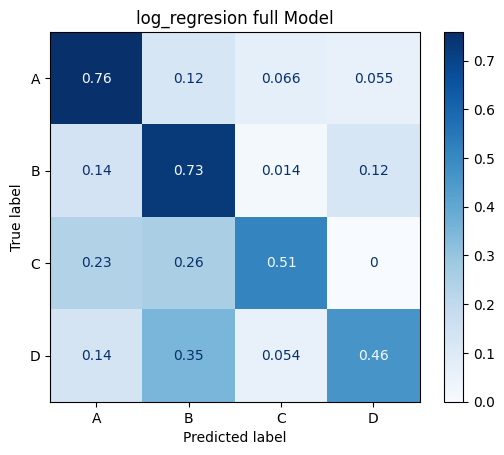

In [97]:
predicted = predicted.replace(dict(zip(range(4),"ABCD")))
disp = ConfusionMatrixDisplay.from_predictions(
        reg_test["global_trajectory"],
        predicted,
        
        cmap=plt.cm.Blues,
    normalize = "true",

    )

plt.title("log_regresion full Model")
plt.show()

In [98]:
base_model = discrete_model.MNLogit(reg_train["global_trajectory"] ,tools.add_constant(reg_train[used_predictors]).fillna(False).replace({False:0,True:1})).fit()
base_predicted = base_model.predict(tools.add_constant(reg_test[used_predictors]).fillna(False).replace({False:0,True:1})).T.idxmax()
base_predicted = base_predicted.replace(dict(zip(range(4),"BACD")))

Optimization terminated successfully.
         Current function value: 1.025220
         Iterations 6


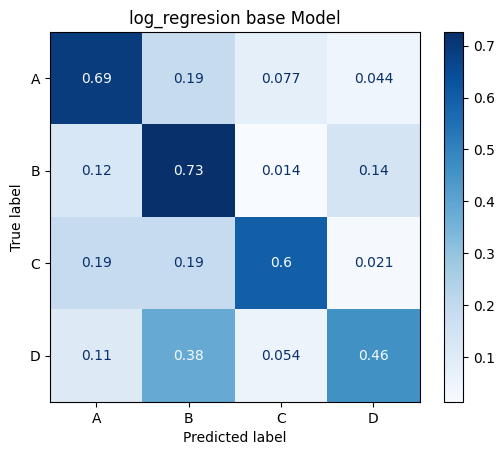

In [99]:
base_predicted = base_predicted.replace(dict(zip(range(4),"ABCD")))
disp = ConfusionMatrixDisplay.from_predictions(
        reg_test["global_trajectory"],
        base_predicted,
        
        cmap=plt.cm.Blues,
    normalize = "true",

    )

plt.title("log_regresion base Model")
plt.show()

In [100]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(reg_test["global_trajectory"], predicted,)
print(classification_report(reg_test["global_trajectory"], predicted))

              precision    recall  f1-score   support

           A       0.73      0.76      0.74        91
           B       0.60      0.73      0.65        73
           C       0.73      0.51      0.60        47
           D       0.55      0.46      0.50        37

    accuracy                           0.66       248
   macro avg       0.65      0.61      0.62       248
weighted avg       0.66      0.66      0.65       248



In [101]:
print(classification_report(reg_test["global_trajectory"], base_predicted))

              precision    recall  f1-score   support

           A       0.74      0.69      0.72        91
           B       0.57      0.73      0.64        73
           C       0.74      0.60      0.66        47
           D       0.53      0.46      0.49        37

    accuracy                           0.65       248
   macro avg       0.64      0.62      0.63       248
weighted avg       0.66      0.65      0.65       248



In [102]:
reg_analysis.columns

Index(['TJC_28', 'SJC_28', 'ESR', 'leukocytes', 'hb_corrected', 'MCV',
       'thrombocytes', 'TJC_28_o', 'SJC_28_o', 'ESR_o',
       ...
       'symptomDuration', 'label_y', 'pred_y', 'PEC', 'last_visit',
       'baseline_year', 'first_med_date', 'first_pred_date', 'delta_meds',
       'log_symptomDuration'],
      dtype='object', length=101)